# Распределение  Пуассона и последовательность 


Зададим функцию $genpoiss(\lambda)$, будет генерировать реализации по Пуассону. 

In [49]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pandas as pd
import random
import time
from scipy.stats import laplace, uniform, chi2

In [43]:
sizes_of_data = [50, 100, 500, 1000, 5000, 10000]
sizes_times = [1000, 10000, 100000, 500000, 1000000]

## Функции генерации

In [63]:
def genpoiss(p_lambda, size):
    """
    Генераця чисел по закону Пуассона
    p_lambda - int (коэффиент распределения)
    size - размер данных
    
    genpoiss(p_lambda,size) -> list
    """
    our_numb = []
    for i in range(size):
        p = np.exp(-p_lambda)
        sp = 0
        sp += p
        u = np.random.uniform(0, 1)
        j = 0
        while u > sp:
            j += 1  # p_j
            p *= p_lambda / j  # p_j / p_j-1 = p_lambda / j
            sp += p
        our_numb.append(j)
    return our_numb

In [64]:
print(genpoiss.__doc__)


    Генераця чисел по закону Пуассона
    p_lambda - int (коэффиент распределения)
    size - размер данных
    
    genpoiss(p_lambda,size) -> list
    


In [52]:
def LCG(seed, a=1103515245, c=12345, m=2**32):
    """
    Линейный конгруэнтный генератор
    
    seed (int) - начальное значение
    a (int) - множитель (изначально 1103515245)
    c (int) - инкремент (default 12345)
    m (int) - модуль (default 2 ** 32)
    
    LCG(seed, a, c, m) -> float
    """
    xf = seed
    while True:
        xf = (a * xf + c) % m
        yield xf


def random_sample(n, interval, seed):
    """
    Генератор псевдорандомных выборок
    
    n (int) - объем массива
    interval (list) - интервальное распределение
    seed (int) - начальное значение
    
    random_sample(n, interval, seed) -> list
    """
    lower, upper = interval[0], interval[1]
    sample = []
    sop = LCG(seed)
    for i in range(n):
        checks = (upper - lower) * (next(sop) / (2**32 - 1)) + lower
        sample.append(int(np.around(checks, 0)))

    return sample

In [54]:
print(LCG.__doc__)


    Линейный конгруэнтный генератор
    
    seed (int) - начальное значение
    a (int) - множитель (изначально 1103515245)
    c (int) - инкремент (default 12345)
    m (int) - модуль (default 2 ** 32)
    
    LCG(seed, a, c, m) -> float
    


In [55]:
print(random_sample.__doc__)


    Генератор псевдорандомных выборок
    
    n (int) - объем массива
    interval (list) - интервальное распределение
    seed (int) - начальное значение
    
    random_sample(n, interval, seed) -> list
    


In [15]:
seed = 1590597906485

sample_lsg = np.empty(len(sizes_of_data), dtype=np.ndarray)

for i, size in enumerate(sizes_of_data):
    sample_lsg[i] = random_sample(size, [0, 10001], seed)

In [13]:
massiv_poissov = [[], [], [], [], []]
for i in range(len(massiv_poissov)):
    ps_lambda = 5
    massiv_poissov[i] = np.array(
        genpoiss(ps_lambda, size=np.random.randint(1000, 2000)))

## Функции для среднего, отклонения и коэффициента вариации

In [57]:
def means(sample):
    """
    Среднее значение
    sample - массив данных
    means(sample) -> float
    
    """
    return np.round(np.sum(sample) / len(sample), 3)


def deviation(sample):
    """
    Средне квадратичное тклонение
    sample - массив данных
    means(sample) -> float
    
    """
    return np.round(np.sqrt(np.sum((sample - means(sample))**2) / len(sample)),
                    3)


def coefv(sample):
    """
    Коээфициент вариации
    sample - массив данных
    means(sample) -> float
    
    """
    return np.round(deviation(sample) / means(sample), 3)

In [58]:
print(means.__doc__)
print(deviation.__doc__)
print(coefv.__doc__)


    Среднее значение
    sample - массив данных
    means(sample) -> float
    
    

    Средне квадратичное тклонение
    sample - массив данных
    means(sample) -> float
    
    

    Коээфициент вариации
    sample - массив данных
    means(sample) -> float
    
    


In [22]:
list_means_r, list_deviations_r, list_coefvs_r = [], [], []
print("Линейный конгруэтный метод")
for i in sample_lsg:
    list_means_r.append(means(i))
    list_deviations_r.append(deviation(i))
    list_coefvs_r.append(coefv(i))
print('Список средних для каждой выборки: ', *list_means_r)
print('Список отклонений для каждой выборки: ', *list_deviations_r)
print('Cписок коэффициентов вариаций для каждой выборки: ', *list_coefvs_r)

Линейный конгруэтный метод
Список средних для каждой выборки:  4329.14 4880.86 5129.112 5008.972 4996.249 5031.903
Список отклонений для каждой выборки:  2895.218 2911.399 2918.343 2893.962 2897.779 2895.381
Cписок коэффициентов вариаций для каждой выборки:  0.669 0.596 0.569 0.578 0.58 0.575


In [48]:
list_means_p, list_deviations_p, list_coefvs_p = [], [], []
for i in massiv_poissov:
    list_means_p.append(means(i))
    list_deviations_p.append(deviation(i))
    list_coefvs_p.append(coefv(i))
print('Распределение Пуассона')
print('Список средних для каждой выборки: ', *list_means_p)
print('Список отклонений для каждой выборки: ', *list_deviations_p)
print('Cписок коэффициентов вариаций для каждой выборки: ', *list_coefvs_p)

Распределение Пуассона
Список средних для каждой выборки:  4.993 4.928 4.862 4.961 5.07
Список отклонений для каждой выборки:  2.272 2.241 2.277 2.199 2.285
Cписок коэффициентов вариаций для каждой выборки:  0.455 0.455 0.468 0.443 0.451


## Статистика Хи-квадрат для Пуассона

In [65]:
def probs_pois(x):
    """Плотность вероятности распределения Пуассона
       x - число из выборки
       
       probs_pois(x) -> float
    
    """
    
    d = list(map(lambda z: ((5**z * np.exp(-5)) / math.factorial(z)), x))
    return d

In [66]:
print(probs_pois.__doc__)

Плотность вероятности распределения Пуассона
       x - число из выборки
       
       probs_pois(x) -> float
    
    


In [50]:
list_of_xis_pois, list_of_intervals = [], []
for i in massiv_poissov:
    UniqueVal, CountFreq = np.unique(i, return_counts=True)
    df = pd.DataFrame({'k': UniqueVal, 'n_k': CountFreq})
    df['pbility_k'] = probs_pois(UniqueVal)
    df = df[df['pbility_k'] > 0.0001]
    df['npbility_k'] = df['n_k'].sum() * df['pbility_k']
    df['xi'] = (df['n_k'] - df['npbility_k'])**2 / df['npbility_k']
    list_of_xis_pois.append(df['xi'].sum())
    list_of_intervals.append(len(df['k']) - 1)
for i in range(len(list_of_xis_pois)):
    print(list_of_xis_pois[i], list_of_intervals[i])

20.558867294960308 14
18.07163306207473 14
23.39930655979697 14
13.734471125918958 13
38.055979104839864 14


Уровни значимости:


$\chi^2(14, 0.8) = 18,1508$\
$\chi^2(14, 0.9) = 21,0641$

$\chi^2(14, 0.9) = 21,0641$\
$\chi^2(14, 0.95) = 23,6848$

$\chi^2(13, 0.6) = 13,6356$\
$\chi^2(13, 0.7) = 15,1187$

$\chi^2(14, 0.99) = 30,5779$\


## Статистика Хи-квадрат для LCG

In [30]:
def chi(data, number, inter):
    """

    data (list) -масссив данных
    number (int) - число элементов в интервале
    inter (int) - число интервалов
    """
    lsta = sorted(data)
    count = 1
    interval_end = []
    interval_end.append(lsta[0])

    for i in lsta:
        if count == number:
            interval_end.append(i + 0.001)
            count = 0
        count += 1

    n = len(lsta)
    before = interval_end[:-1]
    after = interval_end[1:]
    Sams = [number] * len(before)
    probability = np.array(
        list(
            map(
                lambda i: n * (uniform.cdf(after[i] / 10000) - uniform.cdf(
                    before[i] / 10000)), range(inter))))

    K = sum((Sams - probability)**2 / (probability))
    return np.round(K, 3)

In [36]:
elements_number = (5, 10, 25, 40, 200, 250)
intervals_number = (10, 10, 20, 25, 25, 40)
for i in range(6):
    chis = chi(sample[i], elements_number[i], intervals_number[i])
    print(f'Критерий Пирсона для n = {int(sizes_of_data[i])}')
    print(f'\u03C7^2({intervals_number[i]-1}) = {chis}\n')

Критерий Пирсона для n = 50
χ^2(9) = 16.193

Критерий Пирсона для n = 100
χ^2(9) = 15.89

Критерий Пирсона для n = 500
χ^2(19) = 32.846

Критерий Пирсона для n = 1000
χ^2(24) = 20.501

Критерий Пирсона для n = 5000
χ^2(24) = 17.178

Критерий Пирсона для n = 10000
χ^2(39) = 34.648



Уровни значимости:


$\chi^2(9, 0.9) = 14,6837$\
$\chi^2(9, 0.95) = 16,9190$

$\chi^2(19, 0.95) = 30,1435$\
$\chi^2(19, 0.975) = 32,8523$

$\chi^2(24, 0.1) = 15,6587$\
$\chi^2(24, 0.2) = 18,0618$

$\chi^2(39, 0.30) = 33,9315$\
$\chi^2(39, 0.4) = 36,1628$

## Измерение времени генерации

In [44]:
time_lsg, time_poiss, time_rand = [], [], []
for i in sizes_times:
    x = time.time()
    np.random.randint(1, 100, int(i))
    y = time.time() - x
    time_rand.append(y)

    x = time.time()
    random_sample(size, [0, 10001], seed)
    y = time.time() - x
    time_lsg.append(y)

    x = time.time()
    genpoiss(5, int(i))
    y = time.time() - x
    time_poiss.append(y)

## Сравнение времени генерации 

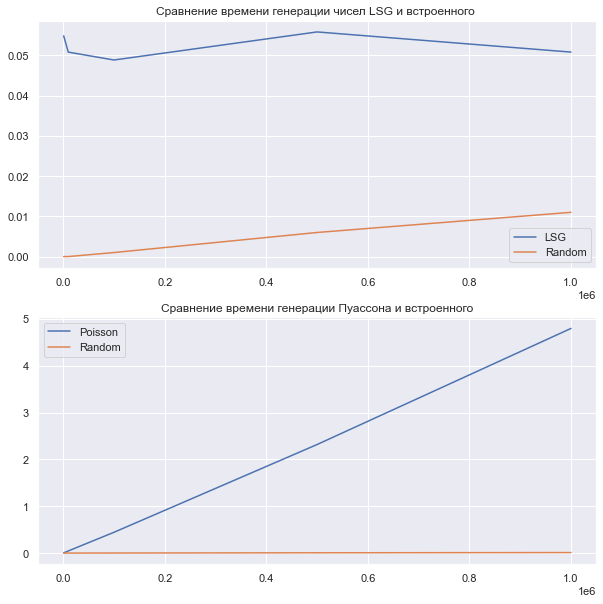

In [47]:
fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(10, 10))
ax1.plot(sizes_times, time_lsg, label='LCG')
ax1.plot(sizes_times, time_rand, label='Random')

ax1.legend()
ax1.set_title('Сравнение времени генерации чисел LCG и встроенного ')

ax2.plot(sizes_times, time_poiss, label='Poisson')
ax2.plot(sizes_times, time_rand, label='Random')
ax2.set_title("Сравнение времени генерации Пуассона и встроенного")
ax2.legend()